In [1]:
using LinearAlgebra, Plots, BenchmarkTools, LaTeXStrings
using NAJ

In [2]:
ff(x) = x*sin(2*π * x)
ffp(x) = sin(2*π*x)+(2*π *x)*cos(2*π *x)

ffp (generic function with 1 method)

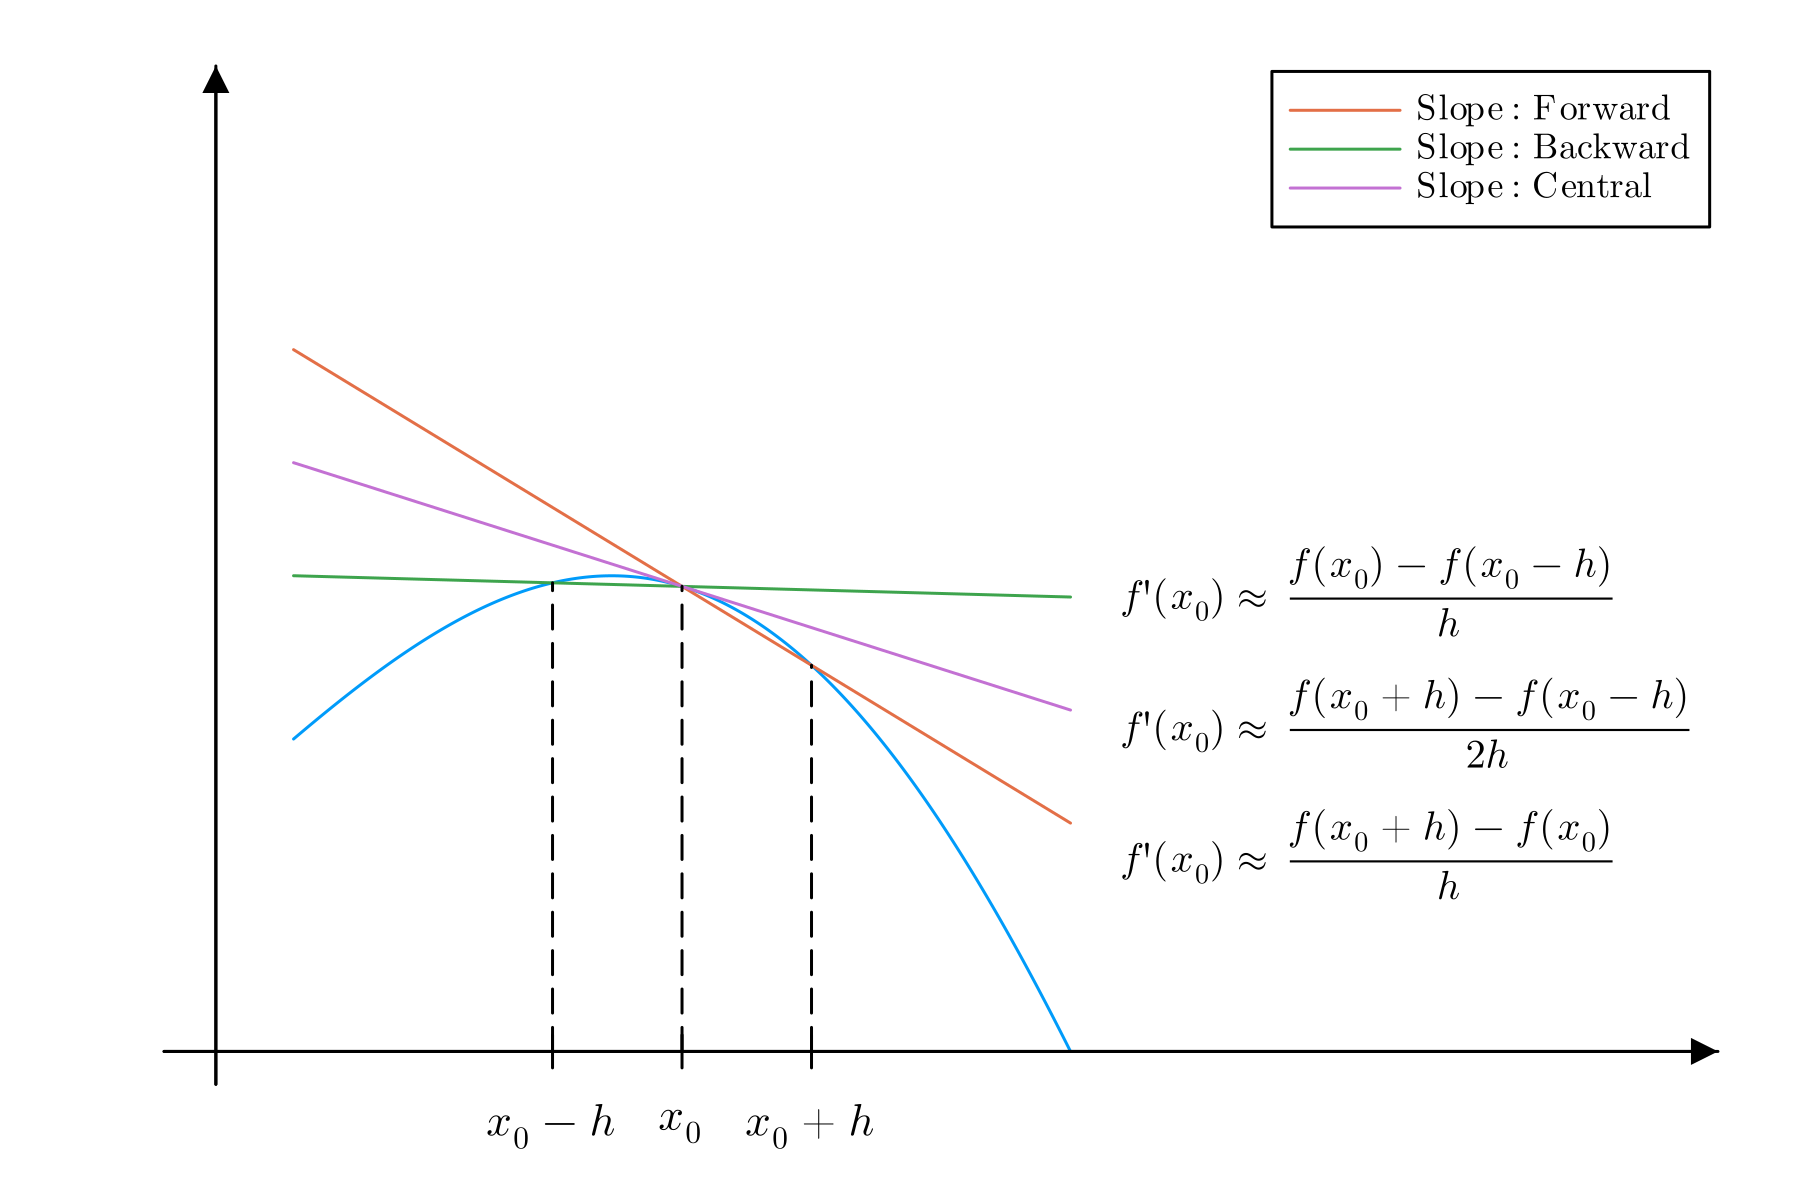

In [3]:
t = 0.2:0.001:0.5
plot(t, ff.(t), frame = :none, label=:none, dpi=300)

df1 = (ff(0.40)-ff(0.35))/0.05
plot!(t, df1.*(t.-0.35) .+ ff(0.35), label = L"\textrm{Slope:Forward}")
annotate!(0.52, 0.28, text(L"f'(x_0) \approx \frac{f(x_0)-f(x_0-h)}{h}", :black, :left, 9))

df2 = (ff(0.35)-ff(0.30))/0.05
plot!(t, df2.*(t.-0.35) .+ ff(0.35), label = L"\textrm{Slope:Backward}")
annotate!(0.52, 0.12, text(L"f'(x_0) \approx \frac{f(x_0+h)-f(x_0)}{h}", :black, :left, 9))


df2 = (ff(0.40) - ff(0.30))/0.1
plot!(t, df2.*(t.-0.35) .+ ff(0.35), label = L"\textrm{Slope:Central}")
annotate!(0.52, 0.20, text(L"f'(x_0) \approx \frac{f(x_0+h)-f(x_0-h)}{2h}", :black, :left, 9))

# plot!(t, ffp(0.35) .* (t.-0.35) .+ ff(0.35), label = L"\textrm{Real }f'(x_0)")
# annotate!(0.52, 0.20, text(L"f'(x_0)", :black, :left, 9))

plot!([0.15, 0.75], [0.0, 0.0], arrow=(:closed, 2.0), lw=1, lc=:black, label=:none)

plot!([0.17, 0.17], [-0.02, 0.6], arrow=(:closed, 2.0), lw=1, lc=:black, label=:none)

plot!([0.35, 0.35], [-0.01, 0.01], lw=1, lc=:black, label=:none)
annotate!(0.35, -0.028, text(L"x_0", :black, :hcenter, :top, 10))

plot!([0.30, 0.30], [-0.01, 0.01], lw=1, lc=:black, label=:none)
annotate!(0.30, -0.028, text(L"x_0-h", :black, 10, :top))

plot!([0.40, 0.40], [-0.01, 0.01], lw=1, lc=:black, label=:none)
annotate!(0.40, -0.028, text(L"x_0+h", :black, :hcenter, :top, 10))

plot!([0.40, 0.40], [0.0, ff(0.40)], lw=1, ls=:dash, lc=:black, label=:none)

plot!([0.35, 0.35], [0.0, ff(0.35)], lw=1, ls=:dash, lc=:black, label=:none)

plot!([0.30, 0.30], [0.0, ff(0.30)], lw=1, ls=:dash, lc=:black, label=:none)

#savefig("difference_01.png")


In [4]:
function ff(x) 
    # return x*sin(x)
    return x*sin(2*π *x)
end

function ffp(x)
    return sin(10*x)+(2*π *x)*cos(10*x)
end


function difference(f::Function, x::T, h = 1.0e-6, kind = :both) where T<:AbstractFloat
    eps = convert(T, h)
    if kind == :forward
        r = (f(x+eps) - f(x))/(eps)
    elseif kind == :backward
        r = (f(x) - f(x-eps))/(eps)

    elseif kind == :both
        r = (f(x+eps) + f(x-eps) - 2*f(x))/(2*eps)
    else 
        error("depth should be 1 or 2")
    end
    return r
end

difference (generic function with 3 methods)

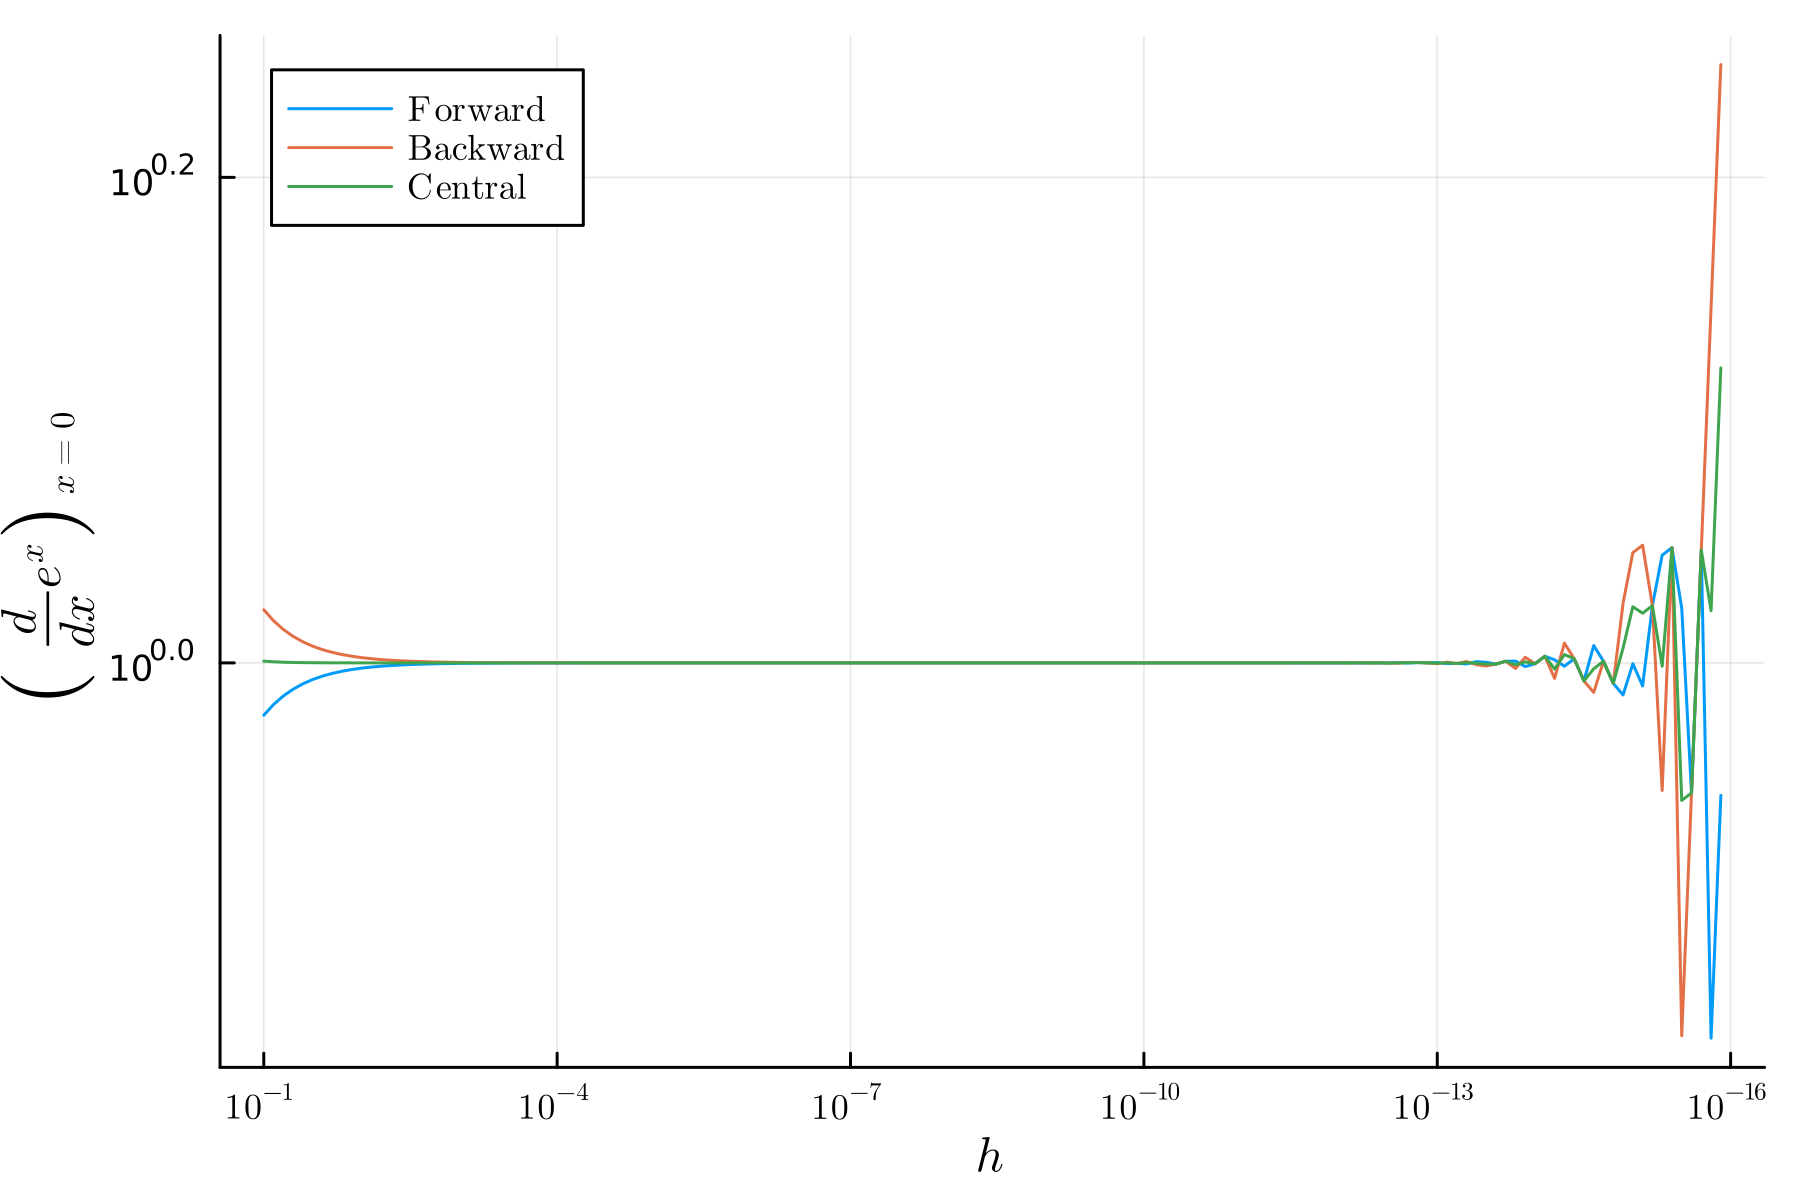

In [5]:
x0 = 0.0
dd = 1:0.1:15.9
hh = 10.0 .^ (.-dd)
d1 = (exp(x0) .- exp.(x0 .- hh))./hh
d2 = (exp.(x0 .+ hh) .- exp(x0))./hh
d3 =  (exp.(x0 .+ hh) .- exp.(x0 .- hh))./(2*hh)

xtc = [1, 4, 7, 10, 13, 16]
xtcs = [L"10^{-%$d}" for d in xtc]
plot(dd, d1, yaxis=:log, xticks = (xtc, xtcs), xlabel = L"h", ylabel = L"\left( \frac{d}{dx}e^x\right)_{x=0}",
    label=L"\textrm{Forward}", dpi=300)
plot!(dd, d2, label=L"\textrm{Backward}")
plot!(dd, d3, label=L"\textrm{Central}")
#savefig("difference_02.png")

In [6]:
function ffp(x)
    return sin(2*π*x)+(2*π *x)*cos(2*π*x)
end


function difference(f::Function, x::T, ϵ = 1.0e-6, npts = 3) where T<:AbstractFloat
    @assert npts ∈ (3, 5)
    eps = convert(T, ϵ)
    if npts == 3
        r = (f(x+eps) - f(x-eps))/(2*eps)
    elseif npts == 5
        r = (f(x-2*eps) - 8*f(x-eps) + 8*f(x+eps)-f(x+2*eps))/(12*eps)
    else 
        error("npts be 3 or 5")
    end
    return r
end

difference (generic function with 3 methods)

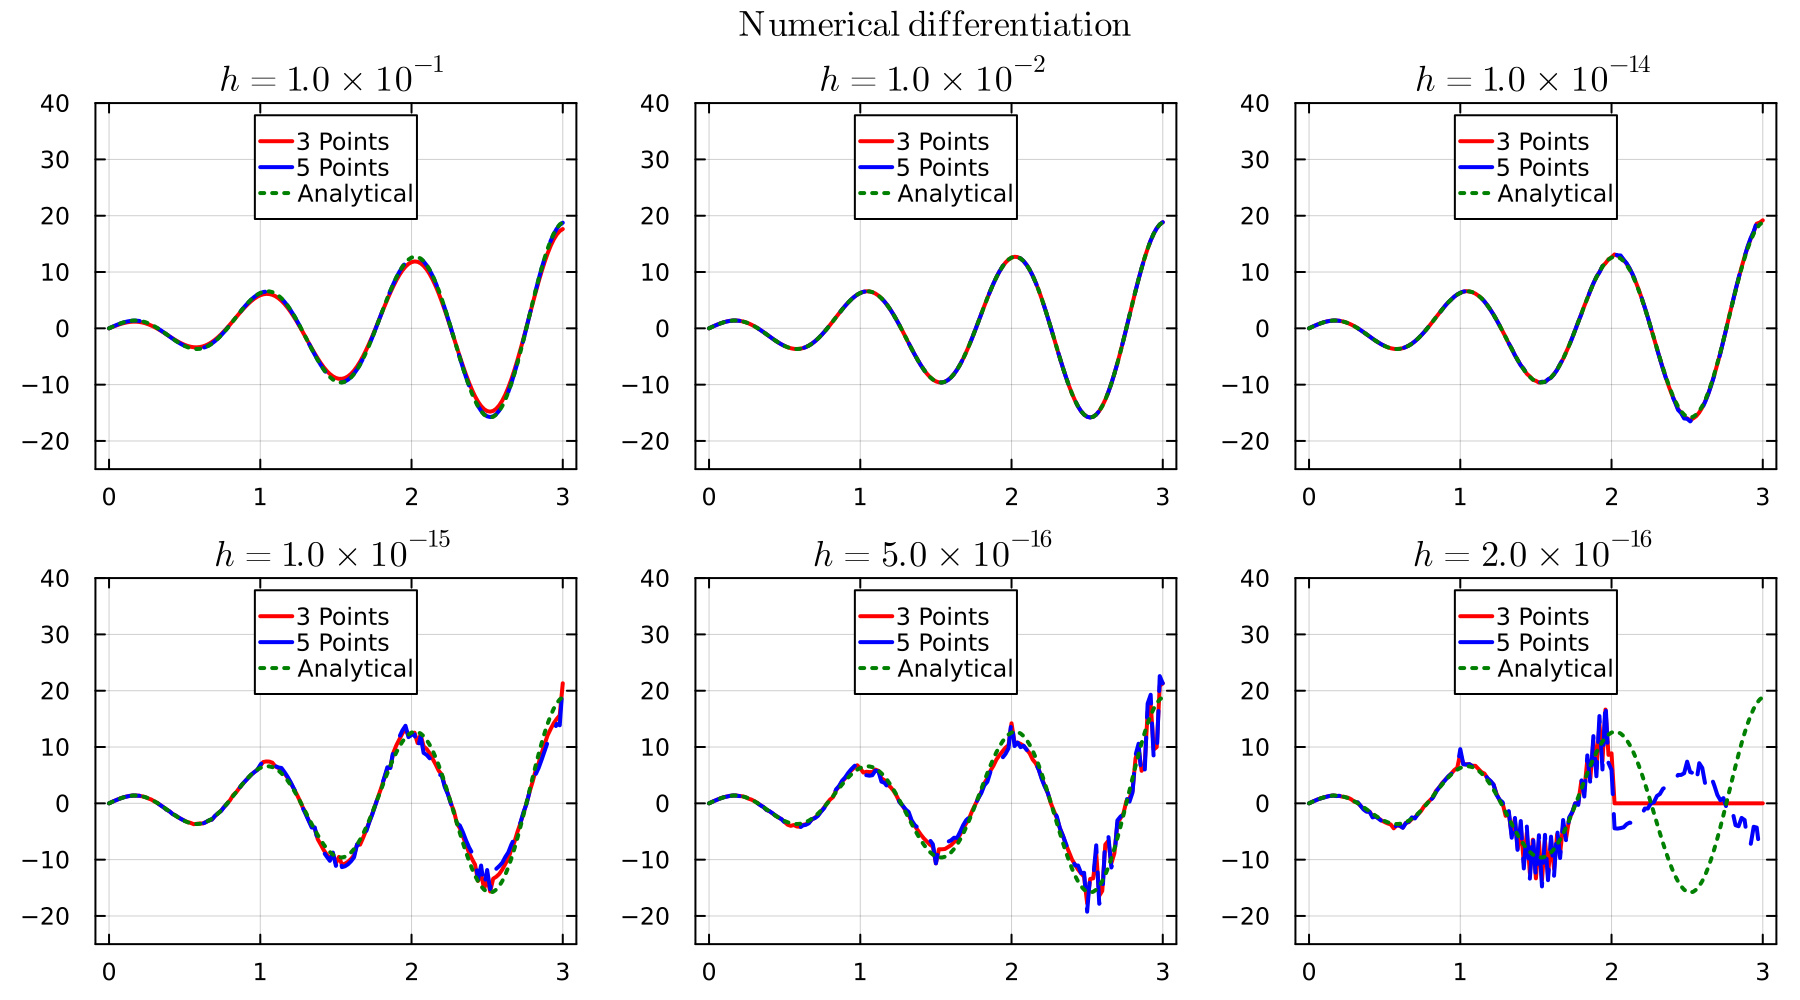

In [7]:
xp=0.0:0.02:3
df1 = [difference(ff, x, 1.0e-1, 3) for x in xp]
df2 = [difference(ff, x, 1.0e-1, 5) for x in xp]
p1 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red, 
    title = L"$h=1.0\times 10^{-1}$", 
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)

df1 = [difference(ff, x, 1.0e-2, 3) for x in xp]
df2 = [difference(ff, x, 1.0e-2, 5) for x in xp]
p2 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red,
    title = L"$h=1.0\times 10^{-2}$",
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)


df1 = [difference(ff, x, 1.0e-14, 3) for x in xp]
df2 = [difference(ff, x, 1.0e-14, 5) for x in xp]
p3 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red,
    title = L"$h=1.0\times 10^{-14}$",
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)

df1 = [difference(ff, x, 1.0e-15, 3) for x in xp]
df2 = [difference(ff, x, 1.0e-15, 5) for x in xp]
p4 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red,
    title = L"$h=1.0\times 10^{-15}$",
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)

df1 = [difference(ff, x, 5.0e-16, 3) for x in xp]
df2 = [difference(ff, x, 5.0e-16, 5) for x in xp]
p5 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red,
    title = L"$h=5.0\times 10^{-16}$",
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)

df1 = [difference(ff, x, 2.0e-16, 3) for x in xp]
df2 = [difference(ff, x, 2.0e-16, 5) for x in xp]
p6 = plot(xp, df1, label="3 Points", frame=:box, ms=2, thickness_scaling=1, dpi=200, lw=2, lc=:red,
    title = L"$h=2.0\times 10^{-16}$",
    titlefontsize=12, legend = :top, ylim = (-25, 40))
plot!(xp, df2, label="5 Points", ls=:dash, lw=2, lc=:blue)
plot!(xp, ffp.(xp), label = "Analytical", ls=:dot, lw=2, lc=:green)

plot(p1, p2, p3, p4, p5, p6, layout=(2, 3), size=(900, 500), plot_title=L"$\textrm{Numerical}\;\textrm{differentiation}$", plot_titlefontsize=12)


#savefig("difference1.png")

In [8]:
p = 1:0.1:16
h = [10^(-px) for px in p]

dd = [abs(ffp(1.0)-difference(ff, 1.0, hh, 1)) for hh in h]

plot(p, dd)



AssertionError: AssertionError: npts ∈ (3, 5)

In [ ]:

xtc = [3, 6, 9, 12, 15]
xtcs = [L"10^%$d" for d in xtc]